Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


A Time Series:
 [1] 232.2890 229.5363 233.1459 243.7637 252.6029 259.6774 260.7669 269.7841
 [9] 266.4150 263.9177 268.3072 260.6626 266.6394 277.5158 283.8340 290.3090
[17] 292.4742 300.8307 309.2867 318.3311 329.3724 338.8840 339.2441 328.6006
[25] 314.2554 314.4597 321.4138 329.7893 346.3852 352.2979 348.3705 417.5629
[33] 417.1236 417.7495 412.2339 411.9468 394.6971 401.4993 408.2705 414.2428
[41] 407.9980 403.4608 413.8249 428.1050 445.3387 452.9942 455.7402

[1] 12.92946

[1] 1

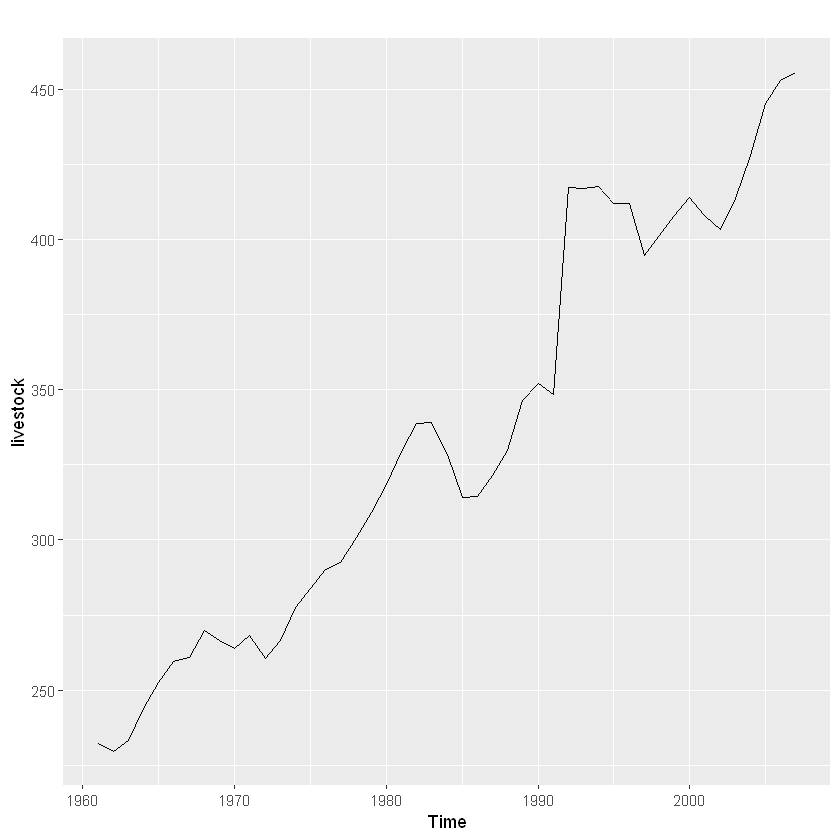


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = livestock, initial = "simple", alpha = opt_alpha) 

  Smoothing parameters:
    alpha = 1 

  Initial states:
    l = 232.289 

  sigma:  12.9295
Error measures:
                  ME     RMSE      MAE    MPE     MAPE      MASE       ACF1
Training set 4.75428 12.92946 8.135283 1.3711 2.384403 0.9787234 0.02366811

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       455.7402 439.1704 472.3099 430.3989 481.0814
2009       455.7402 432.3070 479.1734 419.9022 491.5781
2010       455.7402 427.0405 484.4398 411.8478 499.6325
2011       455.7402 422.6006 488.8797 405.0576 506.4227
2012       455.7402 418.6891 492.7913 399.0754 512.4050
2013       455.7402 415.1527 496.3276 393.6670 517.8133
2014       455.7402 411.9007 499.5796 388.6935 522.7869
2015       455.7402 408.8738 502.6065 384.0642 527.4161
2016       455.7402 406.0309 505.4495 379.7164 531.7640
2

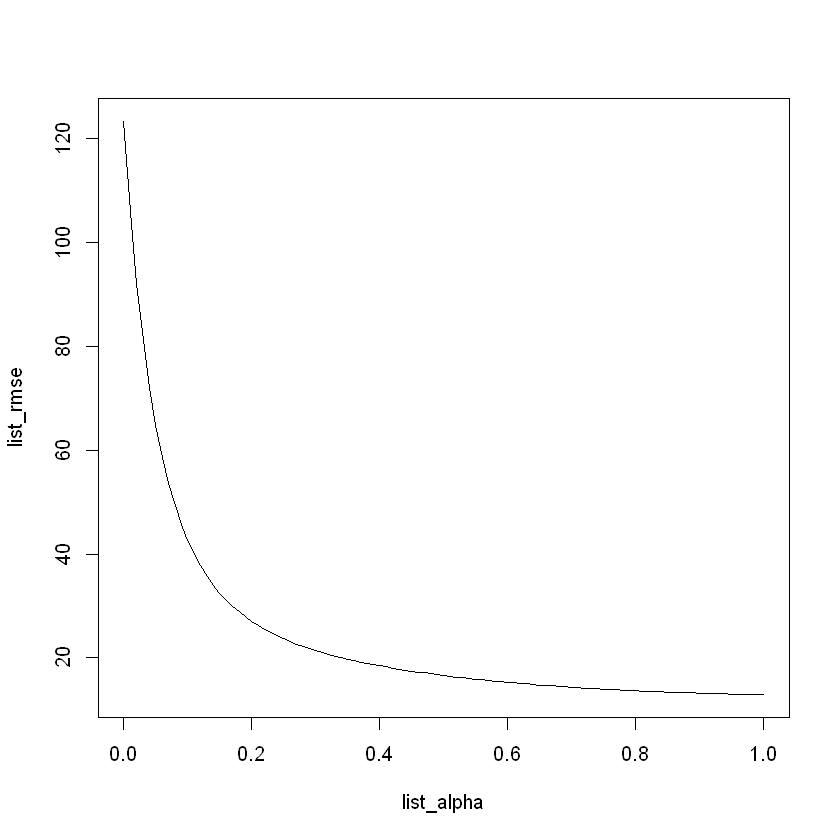

In [1]:
library(forecast)
library(fpp2)

# load data
livestock
autoplot(livestock)

# apply ses by increaments 0.01
list_rmse <- c()
list_alpha <- c()
tmp_alpha <- 0.00

while (tmp_alpha <= 1.0){
    ses_livestock <- ses(livestock, initial="simple", alpha = tmp_alpha)
    list_rmse <- append(list_rmse, sqrt(mean(ses_livestock$residuals^2)))
    list_alpha <- append(list_alpha, tmp_alpha)
    tmp_alpha <- tmp_alpha + 0.01
    tmp_alpha <- round(tmp_alpha, 2) # to eliminate floating point errors
}

# No3. figure out minimal rmse and optimal alpha
min_rmse_idx <- which.min(list_rmse)
min_rmse <- list_rmse[min_rmse_idx]
opt_alpha <- list_alpha[min_rmse_idx]

min_rmse
opt_alpha

plot(list_alpha, list_rmse, type = "l")

ses_livestock <- ses(livestock, initial="simple", alpha = opt_alpha)
ses_optima_livestock <- ses(livestock, initial="simple")
summary(ses_livestock)
summary(ses_optima_livestock)